In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math

# Exercise 1

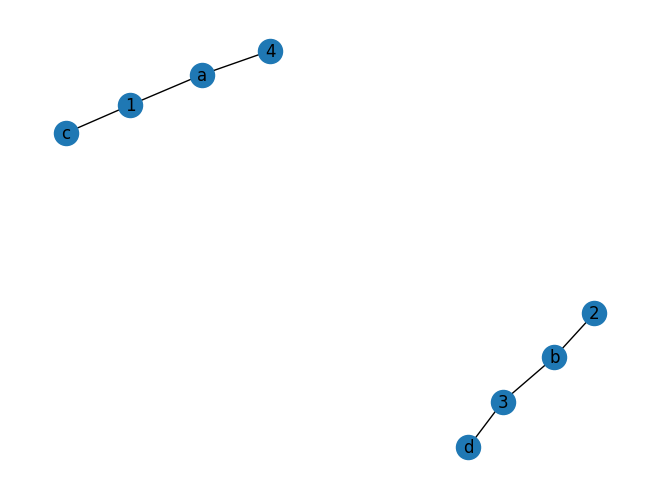

In [8]:
G = nx.Graph()

G.add_nodes_from(['1','2','3','4','a','b','c','d'])
G.add_edges_from(
    [('1', 'a'), ('1', 'c'), ('2', 'b'), ('3', 'b'), ('3', 'd'),
     ('4', 'a')])


nx.draw(G, with_labels=True)
plt.show()

The matching can break depending on the order. The save approach is to first feed edges needed in the matching into the greedy algorithm.
A possible ordering could be:
(1,c) - (4,a) - (3,d) - (2,b) - (3,b) - (1,a)

An ordering which does not return a perfect matching could for example start with the edges which are not part of the perfect matching:
(3,b) - (1,a) - (1,c) - (4,a) - (3,d) - (2,b)

# Exercise 2

We have to show that the advertiser k with the highest budget has the largest value for $\psi_k(q)$.
Looking at the formula we have: $\psi_k(q) = x_k(1-e^{-f_k})$ this can be simplified as by assumption
$x_k=1$. Next one can look at the funktion of $1-e^{-f_k}$ and realize that the bigger $f_k$ is the bigger
is the final value. Hence, one only needs to compare check if $f_k$ is bigger the greater the budget.
$f_k =1 - \frac{spent so far}{budget}$ this is bigger if the fraction is small.

If an advertiser has more budget the fraction becomes smaller and hence he is preferred. Additionally,
if an advertiser has not spent alot of money the fraction also becomes smaller. Hence, this works as required.

# Exercise 3

Suppose we need 3 hash functions which hash to m buckets, hence we add mod m to all hashes. Additionally, we divide by some big prime.
Lastly to differentiate alot we do some exponentials on some random integers:

(1 -  random int a): h(x) = ((a * x¹) mod p ) mod m
(2 -  random int b): h(x) = ((b * x²) mod p ) mod m
(3 -  random int c): h(x) = ((c * x³) mod p ) mod m

The exponential components should spread the inputs among very different ranges additionally.

# Exercise 4

### a)

The formula from the lecture can be used with n=5 and m=1 giving

1-(1-1/5)^(5*(1/5)) = 0.2

### b)
$h_1(1)=1$, $h_2(1)=0$

$h_1(4)=4$, $h_2(4)=1$

state of the bitbucket:
b(0)=1
b(1)=1
b(2)=0
b(3)=0
b(4)=1

h1 can hit all bites while h2 can only hit the odd ones. Hence, odd index bits are actually mor likely to be hit.

### c)

The probability of a false positive is: $1 - e^{\frac{-m}{n}}=1 - e^{\frac{-1}{5}}$ which is approximately 0.1812.

# Exercise 5

### a)
We need to determine for which k-values we have the lowest error rate after m/8 steps considering different array sizes.


In [33]:
def get_error_rate_func(n,m):
    # we use the formula from the lecture
    function = lambda k: math.pow((1 - math.pow(math.e,((-k*m) / n))),k)
    return function

Probing for n of size :1*m
0.11750309741540454
Probing for n of size :2*m
0.06058693718652419
Probing for n of size :3*m
0.040810542890861834
Probing for n of size :4*m
0.03076676552365587
Probing for n of size :5*m
0.024690087971667385
Probing for n of size :6*m
0.02061781866875978
Probing for n of size :7*m
0.017698648900262293
Probing for n of size :8*m
0.015503562994591547
Probing for n of size :9*m
0.013792883256083743
Probing for n of size :10*m
0.012422199506118559
Probing for n of size :11*m
0.011299314123332849
Probing for n of size :12*m
0.01036260108500342
Probing for n of size :13*m
0.009569304615308916
Probing for n of size :14*m
0.008888830100408085
Probing for n of size :15*m
0.008298707361124036
Probing for n of size :16*m
0.007782061739756485
Probing for n of size :17*m
0.007325974439920335
Probing for n of size :18*m
0.006920387509683934
Probing for n of size :19*m
0.0065573534751627305
Probing for n of size :20*m
0.006230509376605298


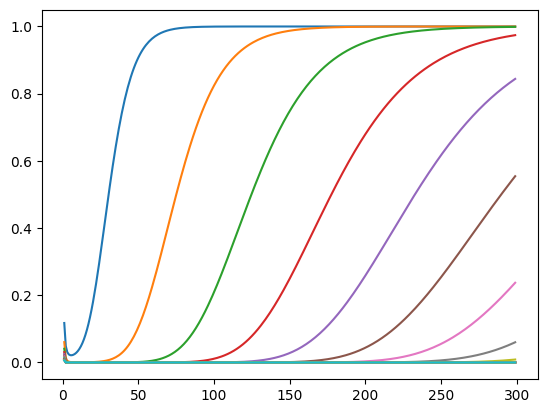

In [43]:
# let's define the number of steps to be 100 = m/8
steps = 1000

# hence we know that m is 8*steps
m = steps * 8

# next we can define the different sizes of bit arrays fow which we probe
n_s = np.arange(1,21,1)
n_s = n_s * m

# lastly we can define for which k's we are going to probe
k_s = np.arange(1,300,1)

x=1
# actual probing and plotting
for n in n_s:
    print("Probing for n of size :" +str(x)+"*m")
    calculator_function = get_error_rate_func(n,steps)
    print(calculator_function(1))
    error_rates=[]
    for k in k_s:
        error_rates.append(calculator_function(k))

    plt.plot(k_s,error_rates)
    x+=1


Functions of lower m's reach their local minimum earlier and scale at an earlier point. However, even for large values of m large k's do not provide a significant improvement as the local minimum is barly better than on reached for even quite low k. Meaning fo k~6 a good value is reached for all functions

### b)

In [49]:
# let's define the number of steps to be 100 = m/8
steps = 100

# hence we know that m is 8*steps
m = steps * 8

# next we can define the different sizes of bit arrays fow which we probe
n_s = np.arange(1,100,1)
n_s = n_s * m

# lastly we can define for which k's we are going to probe
k_s = np.arange(1,300,1)

x=1

smallest_n_one_percent =        1000000
smallest_n_point_five_percent = 1000000
smallest_n_point_one_percent  = 1000000

smallest_k_one_percent =        1000000
smallest_k_point_five_percent = 1000000
smallest_k_point_one_percent  = 1000000
# actual probing and plotting
for n in n_s:
    calculator_function = get_error_rate_func(n,steps)
    for k in k_s:
        error_rate = calculator_function(k)
        if error_rate < 0.01:
            if n <smallest_n_one_percent:
                smallest_n_one_percent=n
                smallest_k_one_percent=k

            if error_rate < 0.005:
                if n <smallest_n_point_five_percent:
                    smallest_n_point_five_percent=n
                    smallest_k_point_five_percent=k

            if error_rate < 0.001:
                if n <smallest_n_point_one_percent:
                    smallest_n_point_one_percent=n
                    smallest_k_point_one_percent=k

print("For one percent the following results were found:")
print("n: "+str(smallest_n_one_percent))
print("k: "+str(smallest_k_one_percent))

print("For point five percent the following results were found:")
print("n: "+str(smallest_n_point_five_percent))
print("k: "+str(smallest_k_point_five_percent))

print("For point one percent the following results were found:")
print("n: "+str(smallest_n_point_one_percent))
print("k: "+str(smallest_k_point_one_percent))


For one percent the following results were found:
n: 1600
k: 3
For point five percent the following results were found:
n: 1600
k: 3
For point one percent the following results were found:
n: 1600
k: 6


# Exercise 6

By result of the lecture we know the probability with wich a error occurs in any of the individual arrays.
It is for n' = n/k :
$1-e^{-m/(n/k)}$
Additionally we know that this has to be true for all k arrays at the same time hence:
$(1-e^{-m/(n/k)})^k$
Solving using the laws of exponential gives:
$(1-e^{-mk/n}) $
this is exactly the same as what we covered in the lecture for k hash functions into the same array.

# Exercise 7 -- skiped for now

# Exercise 8

### a)
It's the university ID.

### b)
It's the student ID. We don't care for their university and we furthermore do not care if we by chance have duplicate IDs.

### c)
It's the course ID - in combination with the university ID. We need to ensure that each grade is assigned to the correct
unique course as else the fractions could be very false.

# Exercise 9 --- skipped for now

# Exercise 10 --- skipped for now